1. Introduction
    1. Context
    1. Significance
    1. Expected Outcomes
1. Data Acquisition and Preparation
    1. Data Acquisition
    1. Preparation
1. Pre-Processing
1. Methodology
    1. Dataset Metrics
    1. Defining the Dividends Threshold
1. Conclusion
1. References

# Introduction

<p style="text-align: justify;text-justify: inter-word;">
In the context of investment analysis,  there are diverse methodologies for investors to compare stocks to identify which stocks are more attractive than others. Among these methods, a reliable approach involves assessing a company's attractiveness by evaluating its dividend payout ratio and dividend yield over a specific timeframe. In this coursework, our focus lies in presenting an analytical framework to compare and identify attractive companies by using the dividend yield and the dividend payout ratio. The stocks under examination are constituents of the NASDAQ index and have disbursed dividends during the year 2023.
</p>

## Context

<p style="text-align: justify;text-justify: inter-word;">
Throughout this coursework, we will assess companies across diverse sectors, encompassing basic materials, energy, financials, healthcare, among others, that are constituents of the NASDAQ index. As highlighted by the CFI Team (2023), the NASDAQ stands as a prominent U.S.-based stock market exchange, ranking as the second-largest globally in terms of market capitalization. This coursework will primarily concentrate on companies that distributed dividends in 2023, as it is widely acknowledged that  "paying dividends is more common among mature and well-established companies" (Gunnars & Wood, 2023).</p>

<p style="text-align: justify;text-justify: inter-word;">According to Gunnars & Wood (2023), dividends represent monetary distributions made by companies to their shareholders, typically issued as a fixed amount per share. While dividends are primarily disbursed in cash, there are instances where they can take other forms, such as additional shares of stock. "The stability of dividends serves as a significant metric, as companies generally refrain from reducing or eliminating these payouts unless facing financial hardship. It's noteworthy that announcements of dividend cuts often lead to substantial declines in stock prices" (Gunnars & Wood, 2023). Throughout this coursework, key dividend metrics like dividend yield and payout ratio will be employed to assess the attractiveness of stocks and determine the sustainability of the dividends disbursed.</p>


<p style="text-align: justify;text-justify: inter-word;">As per Fernando (2023), the dividend yield can be expressed as a percentage, and it is a financial ratio (dividend/price) that shows how much a company pays out in dividends each year relative to its stock price. The dividend yield metric is a core financial ratio, particularly as investors continue to seek income and assess the relative attractiveness of different stocks based on their dividend-paying capacity. The dividend yield formula is as follows:</p>

$$
Dividend Yield = Price Per Share / Annual Dividends Per Share
$$

<p style="text-align: justify;text-justify: inter-word;">According to the Investopedia team (2023), different from the dividend yield ratio the dividend payout ratio gives investors an idea of how much money it returns to its shareholders compared to how much it keeps on hand to reinvest in growth, pay off debt, or add to cash reserves. The payout ratio indicates the percentage of total net income paid out in the form of dividends. From the payout ratio, we can derive the retention ratio which shows the percentage of net income retained by a company after dividend payments, while the payout ratio indicates the percentage of total net income paid out in the form of dividends. The dividend payout and retention formulas are as follows:</p>

$$
Dividend Payout Ratio = Dividends Paid / Net Income
$$

$$
Retention Ratio = 1 - Dividend Payout Ratio
$$

## Significance

<p style="text-align: justify;text-justify: inter-word;">Accordenly to Rinehart et al. (2022), in a world of low-interest rates, equity income investing provides a means by which investors can generate real income growth in portfolios to meet current and future income needs. Throughout analyzing dividends holds substantial significance for investors as it offers critical insights into a company's financial health and future prospects. Dividends serve as a key indicator of a company's stability and ability to generate consistent profits. A history of regular dividend payments, ideally coupled with increases over time, often signifies financial strength and management's confidence in sustained earnings. Moreover, dividends provide a tangible return on investment, offering investors a source of income irrespective of market fluctuations. Examining dividend policies and payout ratios enables investors to gauge management's strategies regarding capital allocation, growth plans, and overall profitability. For income-focused investors, dividends can represent a vital component of their investment strategy, providing steady cash flow. However, it's essential to note that high dividend yields or payout ratios might not always guarantee a sound investment, as these metrics should be evaluated alongside other financial indicators and the company's overall performance and prospects.</p>

## Expected Outcomes

<p style="text-align: justify;text-justify: inter-word;">Through this experiment, we aim to establish an analytical method to evaluate the appeal of companies based on their dividend disbursements using different dividend metrics. We intend to compare these findings from the entirety of NASDAQ index companies with the metrics specific to each sector. This comparative analysis seeks to provide insights into identifying attractive companies based on their dividend practices.</p>


# Data Acquisition and Preparation

<p style="text-align: justify;text-justify: inter-word;">Along this coursework, authentic data was exclusively sourced from various platforms, including Nasdaq Trader and the Nasdaq Rest APIs. The acquisition of this data involved employing web scraping techniques. "Web scraping is the process of collecting and parsing raw data from the Web" (Amos, 2023). Considering the varied sources of this data, amalgamating them into a unified dataset was imperative to ensure proper processing. The preparation of this dataset entailed extracting the specific sample needed to effectively execute the proposed framework.</p>

<p style="text-align: justify;text-justify: inter-word;">The data acquisition and preparation processes collectively require more than an hour for execution. To streamline the experiment, the resultant datasets—nasdaq-dataset, nasdaq-dividends, nasdaq-sectors, and nasdaq-symbols—from the data acquisition phase will be shared alongside this paper. Due to the time-consuming nature of these processes, the data acquisition was segmented into three parts (symbols, sectors, and dividends acquisition) to mitigate potential connection issues. This segmentation allows for minimizing the impact of errors; for instance, if issues arise during dividends acquisition, there is no need to re-execute the initial two steps. For ongoing validation or execution of the experiment with the most recent data, the pre-generated datasets can be deleted, as they will automatically regenerate during the subsequent execution.</p>


## Data Acquisition

<p style="text-align: justify;text-justify: inter-word;">In order to create a single dataset to assess the attractiveness of a stock, the following data acquisition steps are necessary:</p>

- Extract the list of negotiable companies in the NASDAQ index
- Derive the sector from each negotiable stock
- Derive the dividend metrics to each stock

<p style="text-align: justify;text-justify: inter-word;">On the Nasdaq Trader website, it's available a CSV file with all the negotiable stocks in NASDAQ. The provided CSV contains 5022 rows, with the final row denoting the timestamp indicating the file's creation time. Among these entries, 8 rows are dedicated to tests and are identified through the "Test Issue" column. Currently, 5013 companies were at some moment negotiable within the NASDAQ index. From these 5013 companies, 592 are classified as ETFs, discerned by the boolean column "ETF".</p>

<p style="text-align: justify;text-justify: inter-word;">During the derivation of the sectors, only current negotiable companies will be returned from the Nasdaq company profile API, and with this information, we can identify the non-active companies. The company profile API will provide the following attributes: company name, address, phone number, industry, sector, region, key executives, and the company URL. From these attributes, we are only interested in the sectors, the remaining info is discarded. Currently, only 4136 companies are active from the original list with 5013 companies. The company profile information is extracted by a GET method: https://api.nasdaq.com/api/company/AAPL/company-profile.</p>

<p style="text-align: justify;text-justify: inter-word;">The derivation of the dividends are from the Nasdaq dividends API. The dividends API will provide the following attributes: ex-dividend date, dividend yield, annual dividend, payout ratio, and the dividends history. From these attributes, we are interested in the following fields: dividend yield, annual dividend, payout ratio, and dividend history. Of the 4136 active companies, only 947 companies already distributed dividends. The company dividend hystory is extracted by a GET method: https://api.nasdaq.com/api/quote/AAPL/dividends?assetclass=stocks.</p>



In [1]:
#required libraries to run the expirement
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pandas as pd
import requests
import time


from bs4 import BeautifulSoup
from json import loads

In [2]:
#webscrapping function based on the BeautifulSoup
def get_soup(URL, jar=None):
    request_headers = {
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encondig": "gzip, deflate, br",
    }
    if jar:
        response = requests.get(URL, cookies=jar, headers= request_headers)
    else:
        response = requests.get(URL, headers= request_headers)
        jar = requests.cookies.RequestsCookieJar()
    print(response.url)
    data = response.text
    soup = BeautifulSoup(data, "html.parser")
    return soup, jar

In [3]:
#Create a dataframe from all NASDAQ stocks with the Symbol and Company name (downloaded from https://www.nasdaqtrader.com/dynamic/symdir/nasdaqlisted.txt)
def nasdaq_create_symbols():
    nasdaqlisted = pd.read_csv("data/nasdaqlisted.csv", sep="|")
    nasdaqlisted = nasdaqlisted.drop(5022) # Removing summary row
    nasdaqlisted = nasdaqlisted[nasdaqlisted["Test Issue"] == "N"]
    
    nasdaq_symbols = nasdaqlisted[["Symbol", "Security Name"]]
    nasdaq_symbols = nasdaq_symbols.rename(columns={"Security Name": "Company Name"})
    nasdaq_symbols.to_csv("data/nasdaq-symbols.csv", index=False)

In [4]:
#Dataframe with all negotiable NASDAQ stocks
pd.read_csv("data/nasdaqlisted.csv", sep="|")

,Symbol,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size,ETF,NextShares
0,AACG,ATA Creativity Global - American Depositary Sh...,G,N,N,100.0,N,N
1,AACI,Armada Acquisition Corp. I - Common Stock,G,N,N,100.0,N,N
2,AACIU,Armada Acquisition Corp. I - Unit,G,N,N,100.0,N,N
3,AACIW,Armada Acquisition Corp. I - Warrant,G,N,N,100.0,N,N
4,AADI,"Aadi Bioscience, Inc. - Common Stock",S,N,N,100.0,N,N
...,...,...,...,...,...,...,...,...
5018,ZXYZ.A,Nasdaq Symbology Test Common Stock,Q,Y,N,100.0,NaN,N
5019,ZXZZT,NASDAQ TEST STOCK,G,Y,N,100.0,NaN,N
5020,ZYME,Zymeworks Inc. - Common Stock,Q,N,N,100.0,N,N
5021,ZYXI,"Zynex, Inc. - Common Stock",Q,N,N,100.0,N,N


In [5]:
#Derive the sectors from https://api.nasdaq.com/api/company/AAPL/company-profile in case of failure it means the company is not being commercialized
def nasdaq_create_sectors():
    nasdaq_sectors = pd.read_csv("data/nasdaq-symbols.csv")
    sectors = []
    for symbol in nasdaq_sectors["Symbol"]:
        response = get_soup(f"https://api.nasdaq.com/api/company/{symbol}/company-profile")
        try:
            response = loads(response[0].text)
            if (response["status"]["rCode"] == 200 and response["data"] != None):
                sectors.append(response["data"]["Sector"]["value"])
            else:
                print(f"Symbol {symbol} is not active")
                sectors.append(None)
        except Exception:
            print(f"Error retriving the symbol {symbol}")
            sectors.append(None)
        time.sleep(0.5)
    nasdaq_sectors["Sector"] = sectors
    nasdaq_sectors.to_csv("data/nasdaq-sectors.csv", index=False)

In [6]:
pd.read_csv("data/nasdaq-sectors.csv")

,Symbol,Company Name,Sector
0,AACG,ATA Creativity Global - American Depositary Sh...,Real Estate
1,AACI,Armada Acquisition Corp. I - Common Stock,Finance
2,AACIU,Armada Acquisition Corp. I - Unit,Finance
3,AACIW,Armada Acquisition Corp. I - Warrant,Finance
4,AADI,"Aadi Bioscience, Inc. - Common Stock",Health Care
...,...,...,...
5008,ZURAW,Zura Bio Limited - Warrant,Health Care
5009,ZVRA,"Zevra Therapeutics, Inc. - Common Stock",Health Care
5010,ZVSA,"ZyVersa Therapeutics, Inc. - Common Stock",Health Care
5011,ZYME,Zymeworks Inc. - Common Stock,Health Care


In [7]:
#Derive the dividends from active companies https://api.nasdaq.com/api/quote/AAPL/dividends?assetclass=stocks
def get_dividends(nasdaq_sectors):
    dividends_consolidated = pd.DataFrame(columns=["Symbol", "PaymentDate", "AnnualDividendsPerShare", "DividendYield", "PayoutRatio"])
    dividends_dataset = pd.DataFrame(columns=["Symbol", "Type", "Amount", "Currency", "PaymentDate"])
    for symbol in nasdaq_sectors["Symbol"]:
        response = get_soup(f"https://api.nasdaq.com/api/quote/{symbol}/dividends?assetclass=stocks")
        try:
            response = loads(response[0].text)
            if (response["status"]["rCode"] == 200 and response["data"] != None):
                dataframe_header = pd.DataFrame([{
                    "Symbol": symbol,
                    "PaymentDate": response["data"]["dividendPaymentDate"], 
                    "AnnualDividendsPerShare": response["data"]["annualizedDividend"], 
                    "DividendYield": response["data"]["yield"], 
                    "PayoutRatio": response["data"]["payoutRatio"]
                }])
                dividends_consolidated = pd.concat([dividends_consolidated, dataframe_header], ignore_index=True)
                if (response["data"]["dividends"] != None):
                    for divident_row in response["data"]["dividends"]["rows"]:
                        dataframe = pd.DataFrame([{
                            "Symbol": symbol,
                            "Type": divident_row["type"],
                            "Amount": divident_row["amount"], 
                            "Currency": divident_row["currency"],
                            "PaymentDate": divident_row["paymentDate"],
                        }])
                        dividends_dataset = pd.concat([dividends_dataset, dataframe], ignore_index=True)
            else:
                print(f"Dividend is not available for {symbol}")
                dataframe_header = pd.DataFrame([{
                    "Symbol": symbol,
                    "PaymentDate": np.nan, 
                    "AnnualDividendsPerShare": np.nan, 
                    "DividendYield": np.nan, 
                    "PayoutRatio": np.nan
                }])
                dividends_consolidated = pd.concat([dividends_consolidated, dataframe_header], ignore_index=True)
        except Exception:
            print(f"Error retriving the dividident values for {symbol}")
            dataframe_header = pd.DataFrame([{
                "Symbol": symbol,
                "PaymentDate": np.nan, 
                "AnnualDividendsPerShare": np.nan, 
                "DividendYield": np.nan, 
                "PayoutRatio": np.nan
             }])
            dividends_consolidated = pd.concat([dividends_consolidated, dataframe_header], ignore_index=True)
        time.sleep(0.5)
    return dividends_consolidated, dividends_dataset

In [8]:
#Create the dataframes used during this coursework
def nasdaq_create_dividends():
    nasdaq_sectors = pd.read_csv("data/nasdaq-sectors.csv")
    print(f"Nasdaq available stocks {len(nasdaq_sectors)}")
    nasdaq_sectors = nasdaq_sectors.dropna() #Removing non-active stocks since they will not have dividends
    print(f"After Removing the non-active stocks {len(nasdaq_sectors)}")
    dividends_consolidated, dividends_dataset = get_dividends(nasdaq_sectors)
    dividends_dataset.to_csv("data/nasdaq-dividens.csv", index=False)
    nasdaq_dataset = pd.merge(nasdaq_sectors, dividends_consolidated, on="Symbol", how="left")

    fill_dividends_count(nasdaq_dataset)
    nasdaq_dataset.to_csv("data/nasdaq-dataset.csv", index=False)

In [9]:
pd.read_csv("data/nasdaq-dividens.csv")

,Symbol,Type,Amount,Currency,PaymentDate
0,AACG,Cash,$6.00,USD,08/24/2018
1,AACG,Cash,$0.41,USD,06/15/2017
2,AACG,Cash,$0.41,USD,07/18/2014
3,AAL,Cash,$0.10,USD,02/19/2020
4,AAL,Cash,$0.10,USD,11/20/2019
...,...,...,...,...,...
40331,ZIONP,Cash,$0.2555,USD,06/15/2009
40332,ZIONP,Cash,$0.255555,USD,06/15/2008
40333,ZIONP,Cash,$0.348241,USD,03/15/2008
40334,ZIONP,Cash,$0.3927143,USD,12/15/2007


In [10]:
#Since web scraping the required data takes a long period, we created savepoints to derive only the missing data
def nasdaq_data_acquisition():
    if (os.path.isfile("data/nasdaq-symbols.csv") == False):
        nasdaq_create_symbols()

    if (os.path.isfile("data/nasdaq-sectors.csv") == False):
        nasdaq_create_sectors()
        
    if (os.path.isfile("data/nasdaq-dividens.csv") == False):
        nasdaq_create_dividends()

In [11]:
def get_nasdaq_dataset():
    if (os.path.isfile("data/nasdaq-dataset.csv") == False):
        nasdaq_data_acquisition()

    nasdaq_dataset = pd.read_csv("data/nasdaq-dataset.csv")

    return nasdaq_dataset.drop_duplicates()

In [12]:
get_nasdaq_dataset()

,Symbol,Company Name,Sector,PaymentDate,AnnualDividendsPerShare,DividendYield,PayoutRatio
0,AACG,ATA Creativity Global - American Depositary Sh...,Real Estate,06/15/2017,NaN,NaN,NaN
1,AACI,Armada Acquisition Corp. I - Common Stock,Finance,NaN,NaN,NaN,NaN
3,AACIU,Armada Acquisition Corp. I - Unit,Finance,NaN,NaN,NaN,NaN
5,AACIW,Armada Acquisition Corp. I - Warrant,Finance,NaN,NaN,NaN,NaN
7,AADI,"Aadi Bioscience, Inc. - Common Stock",Health Care,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7158,ZURAW,Zura Bio Limited - Warrant,Health Care,NaN,NaN,NaN,NaN
7160,ZVRA,"Zevra Therapeutics, Inc. - Common Stock",Health Care,NaN,NaN,NaN,NaN
7162,ZVSA,"ZyVersa Therapeutics, Inc. - Common Stock",Health Care,NaN,NaN,NaN,NaN
7164,ZYME,Zymeworks Inc. - Common Stock,Health Care,NaN,NaN,NaN,NaN


## Data Preparation

<p style="text-align: justify;text-justify: inter-word;">Data preparation involves isolating the specific sample required to successfully implement the proposed framework. Given the coursework's focus on stocks that disbursed dividends in 2023, we will extract a sample of companies that fulfilled this criterion, excluding those that never paid dividends or did not do so in 2023. Out of the initial list of 4,136 active companies, only 947 have previously distributed dividends, and from this subset, merely 786 companies paid dividends specifically in 2023.</p>

In [13]:
def drop_stocks_not_paid_dividends(nasdaq_dataset):
    print("Removing the stocks that have never paid dividends")
    print(f"Active Stocks Length {len(nasdaq_dataset)}")
    nasdaq_dividends_dataset = nasdaq_dataset.dropna(subset=["PaymentDate"])
    print(f"After Removing the stocks that have never paid dividends {len(nasdaq_dividends_dataset)}")
    return nasdaq_dividends_dataset

In [14]:
def get_stocks_per_dividens_year(nasdaq_dataset, year):
    print(f"{len(nasdaq_dataset)} Available Stocks")
    nasdaq_dataset_per_year = nasdaq_dataset.loc[nasdaq_dataset["PaymentDate"].str.find(year) > -1]
    print(f"{len(nasdaq_dataset_per_year)} Available Stocks in {year}")
    return nasdaq_dataset_per_year

In [15]:
def get_nasdaq_dividend_dataset(nasdaq_dataset):
    nasdaq_dataset = drop_stocks_not_paid_dividends(nasdaq_dataset)
    nasdaq2023_dataset = get_stocks_per_dividens_year(nasdaq_dataset, "2023")
    return nasdaq2023_dataset

In [16]:
nasdaq2023_dataset = get_nasdaq_dividend_dataset(get_nasdaq_dataset())

Removing the stocks that have never paid dividends
Active Stocks Length 4136
After Removing the stocks that have never paid dividends 947
947 Available Stocks
786 Available Stocks in 2023


In [17]:
nasdaq2023_dataset

,Symbol,Company Name,Sector,PaymentDate,AnnualDividendsPerShare,DividendYield,PayoutRatio
14,AAME,Atlantic American Corporation - Common Stock,Finance,09/12/2023,0.0200,1%,15.46
17,AAON,"AAON, Inc. - Common Stock",Industrials,12/18/2023,0.3200,0.44%,35.37
18,AAPL,Apple Inc. - Common Stock,Technology,11/16/2023,0.9600,0.49%,31.81
21,ABCB,Ameris Bancorp - Common Stock,Finance,10/09/2023,0.6000,1.16%,12.56
88,ACGLN,"Arch Capital Group Ltd. - Depositary Shares, e...",Finance,12/31/2023,1.1375,5.7%,NaN
...,...,...,...,...,...,...,...
7125,ZEUS,"Olympic Steel, Inc. - Common Stock",Industrials,12/15/2023,0.5000,0.75%,19.01
7136,ZION,Zions Bancorporation N.A. - Common Stock,Finance,11/16/2023,1.6400,3.76%,8.08
7137,ZIONL,Zions Bancorporation N.A. - 6.95% Fixed-to-Flo...,Finance,12/15/2023,2.4168,9.48%,NaN
7138,ZIONO,Zions Bancorporation N.A. - Depositary Shares ...,Finance,12/15/2023,2.5053,9.79%,NaN


# Pre-processing

<p style="text-align: justify;text-justify: inter-word;">The pre-processing is crucial for this analysis, especially considering the use of authentic data where the existence of missing values was expected. Additionally, data transformation is necessary due to certain columns being non-numeric. At present, the consolidated dataset encompasses 7 columns, namely: Symbol, Company Name, Sector, PaymentDate, AnnualDividendsPerShare, DividendYield, and PayoutRatio.</p>

<p style="text-align: justify;text-justify: inter-word;">The columns Symbol, Company Name, PaymentDate, and Sector contain categorical data, that are used for individual identification.  In contrast, the columns AnnualDividendsPerShare, DividendYield, and PayoutRatio encompass numerical data utilized for data analysis. Notably, the DividendYield column was initially recorded as a string with a percentage sign appended. As part of the pre-processing phase, this value will be transformed into a numeric format for further analysis.</p>

<p style="text-align: justify;text-justify: inter-word;">There are two occurrences of "NA" in both the AnnualDividendsPerShare and DividendYield columns, all from the same row. Additionally, the PayoutRatio column contained 236 missing values. To tackle this issue, two distinct approaches were implemented: initially, filling the missing values with the mean values specific to each sector; subsequently, incorporating an external dataset. Specifically, the missing values in the AnnualDividendsPerShare column were supplemented using a dividends dataset, which has a historical record of dividends distributed per stock. For the DividendYield and PayoutRatio columns, the missing values were imputed using the mean values of their respective sectors.</p>

<p style="text-align: justify;text-justify: inter-word;">Since the column Sector is categorical, we need to convert this column to numeric. The technique applied to convert the values is hot encoding. According to Brownlee (2019), a one-hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.</p>

<p style="text-align: justify;text-justify: inter-word;">As the last step of the pre-processing, we will remove the categorical columns PaymentDate, and Company Name since they will not be useful for data analysis. The column PaymentDate represents the last time when the dividends were distributed. This column was transformed into the DividendCount, which signifies the frequency of dividend payments within a specific year.</p>

In [18]:
#Enrich missing values based on the webscrapping
def fill_dividends_missing_values(nasdaq_dataset, year):
    missing_anual_dividends = nasdaq_dataset[nasdaq_dataset["AnnualDividendsPerShare"].isnull()]

    dividends_dataset = pd.read_csv("data/nasdaq-dividens.csv")
    dividends_dataset = dividends_dataset.dropna()

    for index, row in missing_anual_dividends.iterrows():
        dividends = dividends_dataset[dividends_dataset["Symbol"] == row["Symbol"]]
        dividends = dividends.loc[dividends["PaymentDate"].str.find(year) > -1]
        dividends["Amount"] = dividends["Amount"].str.slice(start=1)
        amount = list(dividends["Amount"])
        nasdaq_dataset.loc[index,"AnnualDividendsPerShare"] = np.sum([float(value) for value in amount])

In [19]:
def fill_missing_values_by_sector_mean(nasdaq_dataset, field):
    missing_values = nasdaq_dataset[nasdaq_dataset[field].isnull()]
    mean_by_sector = nasdaq_dataset.groupby(by="Sector")[field].mean()
    
    for index, row in missing_values.iterrows():
        nasdaq_dataset.loc[index, field] = mean_by_sector[row["Sector"]]

In [20]:
#Current data format is 0.96% we need to convert to float
def convert_dividend_yield_values_float(nasdaq_dataset):
    def dividend_format(x):
        if pd.isna(x):
            return np.nan
        return float(x[0:-1])
    
    nasdaq_dataset["DividendYield"] = nasdaq_dataset["DividendYield"].apply(dividend_format)

In [21]:
def create_dividends_count(nasdaq_dataset, year):
    dividends_dataset = pd.read_csv("data/nasdaq-dividens.csv")
    dividends_dataset = dividends_dataset.dropna()

    for index, row in nasdaq_dataset.iterrows():
        dividends = dividends_dataset[dividends_dataset["Symbol"] == row["Symbol"]]
        dividends = dividends.loc[dividends["PaymentDate"].str.find(year) > -1]
        nasdaq_dataset.loc[index,"DividendCount"] = len(dividends)

In [22]:
def create_retation_ratio(nasdaq_dataset):
    def dividend_format(value):
        return 1 - (value / 100)
    
    nasdaq_dataset["RetentionRatio"] = nasdaq_dataset["PayoutRatio"].apply(dividend_format)

In [23]:
def get_sector_mappings():
    return { 'Basic Materials': 1,
             'Consumer Discretionary': 2,
             'Consumer Staples': 3,
             'Energy': 4,
             'Finance': 5,
             'Health Care': 6,
             'Industrials': 7,
             'Miscellaneous': 8,
             'Real Estate': 9,
             'Technology': 10,
             'Telecommunications': 11,
             'Utilities': 12
           }

In [24]:
## Apply the mapping here
def map_categorical_to_numeric(nasdaq_dataset):
    sector_mappings = get_sector_mappings()
    nasdaq_dataset['Sector'].replace(sector_mappings, inplace=True)

In [25]:
# Apply encoding on the sectors
def apply_hot_encoding_sectors(nasdaq_dataset):
    dummies = pd.get_dummies(nasdaq_dataset['Sector'], dtype=int, prefix='Sector')
    nasdaq_dataset = pd.concat([nasdaq_dataset, dummies], axis=1)
    nasdaq_dataset.drop(['Sector'], axis=1, inplace=True)
    return nasdaq_dataset

In [26]:
#drop the columns PaymentDate, and Company Name
def remove_catorical_columns(nasdaq_dataset):
    nasdaq_dataset.drop(['PaymentDate'], axis=1, inplace=True)
    nasdaq_dataset.drop(['Company Name'], axis=1, inplace=True)

In [27]:
def nasdaq_data_preprocessing(nasdaq_dataset):
    dataframe = nasdaq_dataset.copy()
    convert_dividend_yield_values_float(dataframe)

    fill_dividends_missing_values(dataframe, "2023")
    fill_missing_values_by_sector_mean(dataframe, "DividendYield")
    fill_missing_values_by_sector_mean(dataframe, "PayoutRatio")

    create_retation_ratio(dataframe)
    create_dividends_count(dataframe, "2023")
    
    remove_catorical_columns(dataframe)

    map_categorical_to_numeric(dataframe)
    dataframe = apply_hot_encoding_sectors(dataframe)
    
    return dataframe

In [28]:
nasdaq2023_dataset.isnull().sum()

Symbol                       0
Company Name                 0
Sector                       0
PaymentDate                  0
AnnualDividendsPerShare      2
DividendYield                2
PayoutRatio                236
dtype: int64

In [29]:
nasdaq2023_dataset['Sector'].value_counts()

Sector
Finance                   388
Consumer Discretionary    120
Industrials                68
Technology                 59
Real Estate                46
Health Care                27
Energy                     25
Utilities                  19
Consumer Staples           16
Telecommunications         12
Basic Materials             4
Miscellaneous               2
Name: count, dtype: int64

In [30]:
nasdaq_dataset = nasdaq_data_preprocessing(nasdaq2023_dataset)
nasdaq_dataset.isnull().sum()

Symbol                     0
AnnualDividendsPerShare    0
DividendYield              0
PayoutRatio                0
RetentionRatio             0
DividendCount              0
Sector_1                   0
Sector_2                   0
Sector_3                   0
Sector_4                   0
Sector_5                   0
Sector_6                   0
Sector_7                   0
Sector_8                   0
Sector_9                   0
Sector_10                  0
Sector_11                  0
Sector_12                  0
dtype: int64

In [31]:
nasdaq2023_dataset[nasdaq2023_dataset['DividendYield'].isnull()]

,Symbol,Company Name,Sector,PaymentDate,AnnualDividendsPerShare,DividendYield,PayoutRatio
2549,FORTY,Formula Systems (1985) Ltd. - American Deposit...,Technology,07/03/2023,NaN,NaN,15.78
3736,LARK,Landmark Bancorp Inc. - Common Stock,Finance,12/15/2023,NaN,NaN,9.78


In [32]:
nasdaq_dataset[(nasdaq_dataset['Symbol'] == 'FORTY') | (nasdaq_dataset['Symbol'] == 'LARK')]

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
2549,FORTY,0.630914,2.635862,15.78,0.8422,1.0,0,0,0,0,0,0,0,0,0,1,0,0
3736,LARK,0.840000,5.242067,9.78,0.9022,4.0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
nasdaq2023_dataset[nasdaq2023_dataset['PayoutRatio'].isnull()].head(4)

,Symbol,Company Name,Sector,PaymentDate,AnnualDividendsPerShare,DividendYield,PayoutRatio
88,ACGLN,"Arch Capital Group Ltd. - Depositary Shares, e...",Finance,12/31/2023,1.1375,5.7%,NaN
89,ACGLO,Arch Capital Group Ltd. - Depositary Shares Ea...,Finance,12/31/2023,1.3625,5.84%,NaN
165,ADTN,"ADTRAN Holdings, Inc. - Common Stock",Telecommunications,09/05/2023,0.3600,5.09%,NaN
239,AGNCL,AGNC Investment Corp. - Depositary Shares Each...,Real Estate,10/16/2023,1.9375,8.81%,NaN


In [34]:
nasdaq_dataset[(nasdaq_dataset['Symbol'] == 'ACGLN')
    | (nasdaq_dataset['Symbol'] == 'ACGLO')
    | (nasdaq_dataset['Symbol'] == 'ADTN')
    | (nasdaq_dataset['Symbol'] == 'AGNCL')]

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
88,ACGLN,1.1375,5.70,18.302007,0.816980,4.0,0,0,0,0,1,0,0,0,0,0,0,0
89,ACGLO,1.3625,5.84,18.302007,0.816980,4.0,0,0,0,0,1,0,0,0,0,0,0,0
165,ADTN,0.3600,5.09,60.528571,0.394714,3.0,0,0,0,0,0,0,0,0,0,0,1,0
239,AGNCL,1.9375,8.81,28.302143,0.716979,4.0,0,0,0,0,0,0,0,0,1,0,0,0


# Methodology

<p style="text-align: justify;text-justify: inter-word;">The proposed analytic framework is based on the Rinehart et al. (2022) equity income approach that has tended to focus on companies that do not necessarily pay the highest dividend yields. This strategy prioritizes quality over yield, considering that companies with the highest dividend yields often exhibit an undesirable mix of traits such as increased financial leverage, higher payout ratios, greater sensitivity to economic cycles, and fundamental business challenges. By concentrating on companies with moderate dividend yields and payout ratios, coupled with promising dividend growth and effective capital return practices such as share buybacks or debt reduction, this approach enables us to uphold standards of quality without compromising on investment returns.</p>

<p style="text-align: justify;text-justify: inter-word;">Based on the above framework to assess the attractiveness of NASDAQ stocks in 2023, our primary focus centers on specific metrics, notably the dividend yield and the payout ratio. We aim to identify stocks with higher dividend yields and sustainable payout ratios. Establishing an optimal threshold and validating our hypothesis will involve presenting a series of statistical metrics.</p>

## Dataset Metrics

<p style="text-align: justify;text-justify: inter-word;">Statistical metrics served a crucial role in comprehending the data distribution and aiding in defining thresholds. Detecting skewness within the data was pivotal, as each value potentially served as a threshold. For instance, in the case of the payout ratio, the mean value was calculated at 26.49%, with the minimum recorded at 0.81%, and an unusually high maximum reaching 1265%. Same with such a significantly high maximum value the data was skewed to the left, indicating possible outliers to the right.</p>

In [35]:
print(f'Average value of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].mean():.2f}')
print(f'Max value of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].max():.2f}')
print(f'Min value of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].min():.2f}')
print(f'Standard Deviation of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].std():.3f}')

Average value of the annual paid dividends per share 1.34
Max value of the annual paid dividends per share 21.00
Min value of the annual paid dividends per share 0.02
Standard Deviation of the annual paid dividends per share 1.501


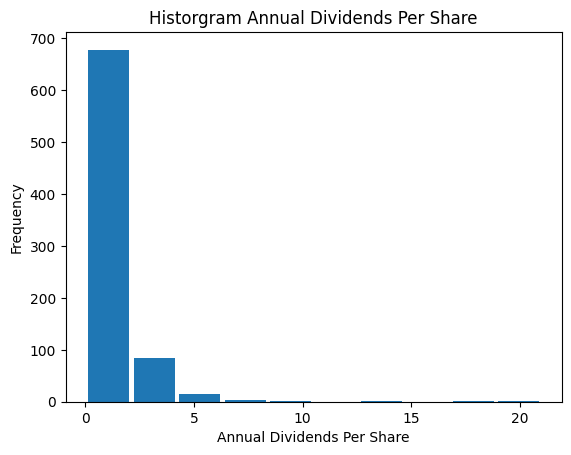

In [36]:
plt.hist(nasdaq_dataset["AnnualDividendsPerShare"], rwidth=0.9)
plt.title("Historgram Annual Dividends Per Share")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [37]:
print(f'Average Dividend Yield Ratio {nasdaq_dataset["DividendYield"].mean():.3f}')
print(f'Max Dividend Yield Ratio {nasdaq_dataset["DividendYield"].max():.3f}')
print(f'Min Dividend Yield Ratio {nasdaq_dataset["DividendYield"].min():.3f}')
print(f'Standard Deviation of the Dividend Yield {nasdaq_dataset["DividendYield"].std():.3f}')

Average Dividend Yield Ratio 4.877
Max Dividend Yield Ratio 94.430
Min Dividend Yield Ratio 0.020
Standard Deviation of the Dividend Yield 5.603


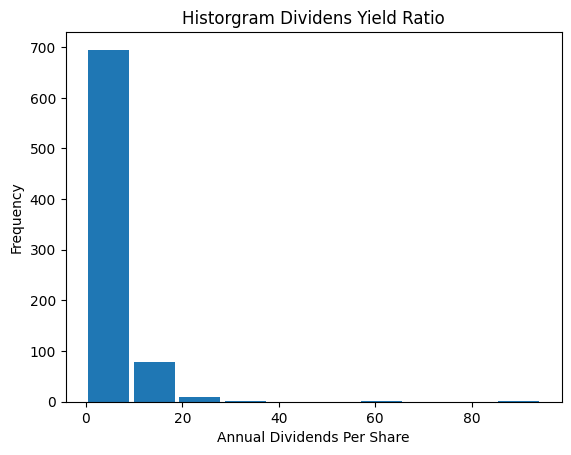

In [38]:
plt.hist(nasdaq_dataset["DividendYield"], rwidth=0.9)
plt.title("Historgram Dividens Yield Ratio")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [39]:
print(f'Average Payout Ratio {nasdaq_dataset["PayoutRatio"].mean():.3f}')
print(f'Max Payout Ratio {nasdaq_dataset["PayoutRatio"].max():.3f}')
print(f'Min Payout Ratio {nasdaq_dataset["PayoutRatio"].min():.3f}')
print(f'Standard Deviation of the Payout Ratio {nasdaq_dataset["PayoutRatio"].std():.3f}')

Average Payout Ratio 26.495
Max Payout Ratio 1265.000
Min Payout Ratio 0.810
Standard Deviation of the Payout Ratio 65.608


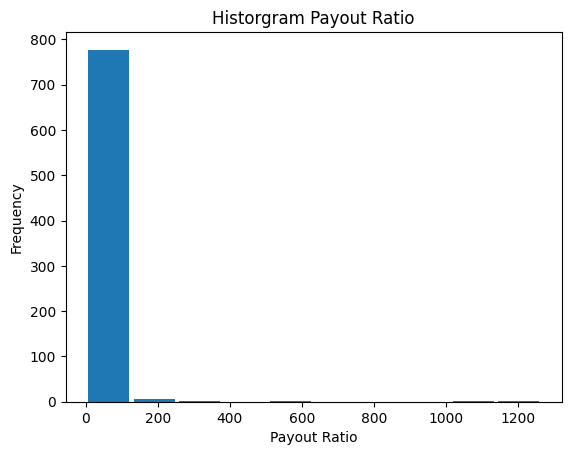

In [40]:
plt.hist(nasdaq_dataset["PayoutRatio"], rwidth=0.9)
plt.title("Historgram Payout Ratio")
plt.xlabel("Payout Ratio")
plt.ylabel("Frequency")
plt.show()

In [41]:
print(f'Average Retention Ratio {nasdaq_dataset["RetentionRatio"].mean():.3f}')
print(f'Max Retention Ratio {nasdaq_dataset["RetentionRatio"].max():.3f}')
print(f'Min Retention Ratio {nasdaq_dataset["RetentionRatio"].min():.3f}')
print(f'Standard Deviation of the Retentio Ratio {nasdaq_dataset["RetentionRatio"].std():.3f}')

Average Retention Ratio 0.735
Max Retention Ratio 0.992
Min Retention Ratio -11.650
Standard Deviation of the Retentio Ratio 0.656


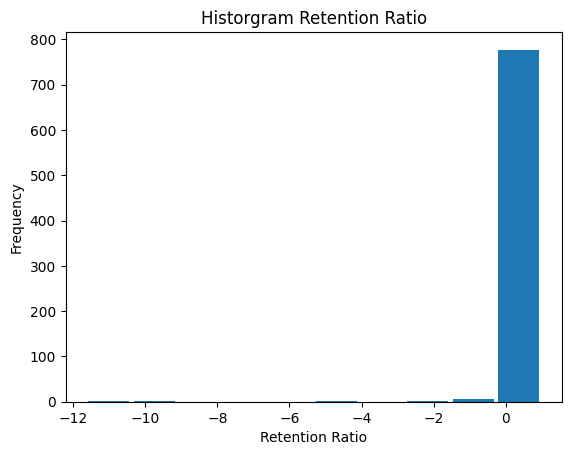

In [42]:
plt.hist(nasdaq_dataset["RetentionRatio"], rwidth=0.9)
plt.title("Historgram Retention Ratio")
plt.xlabel("Retention Ratio")
plt.ylabel("Frequency")
plt.show()

In [43]:
print(f'Average Payment Frequency {nasdaq_dataset["DividendCount"].mean():.3f}')
print(f'Max Payment Frequency {nasdaq_dataset["DividendCount"].max()}')
print(f'Min Payment Frequency {nasdaq_dataset["DividendCount"].min()}')
print(f'Standard Deviation of the Payment Frequency {nasdaq_dataset["DividendCount"].std():.3f}')

Average Payment Frequency 4.209
Max Payment Frequency 17.0
Min Payment Frequency 1.0
Standard Deviation of the Payment Frequency 1.864


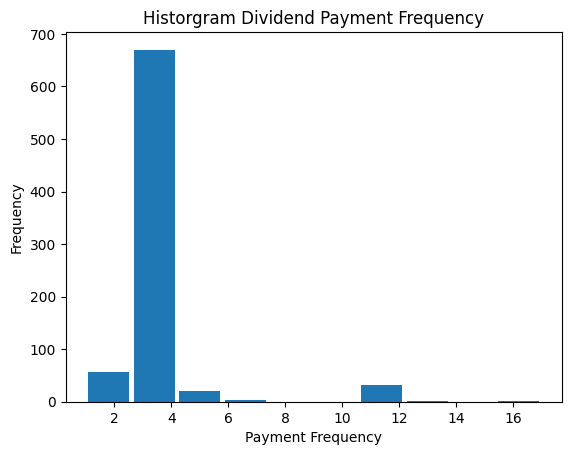

In [44]:
plt.hist(nasdaq_dataset["DividendCount"], rwidth=0.9)
plt.title("Historgram Dividend Payment Frequency")
plt.xlabel("Payment Frequency")
plt.ylabel("Frequency")
plt.show()

## Defining the Dividends Threshold

<p style="text-align: justify;text-justify: inter-word;">As presented in the chart Dividend Yield Ratio versus Payout Ratio, certain companies exhibit elevated dividend yields and payout ratios, yet they may not be considered attractive investments. Fernando (2023) emphasizes the importance for investors to recognize that higher dividend yields don't invariably signify attractive investment opportunities, as a stock's elevated dividend yield might stem from a declining stock price. Additionally, regarding the payout ratio, if a company is disbursing most, or more than 100%, of its earnings through dividends, the sustainability of that dividend yield may be in question (Investopedia, 2023).</p>

<p style="text-align: justify;text-justify: inter-word;">Upon analyzing the list of stocks with higher dividend yields, a couple of notable stocks caught our attention: AUVIP and CSSEP. These stocks exhibited dividend yields exceeding 60%. Observing Figure 1, we can confirm the high dividend yield ratio was in reason of the huge stock price drop.</p>

<p style="text-align: justify;text-justify: inter-word;">Upon analyzing the list of stocks exhibiting payout ratios surpassing 100%, notable mentions include TILE, WYNN, and EXPI. These higher payout values often signal an unsustainability that diminishes their overall attractiveness. As demonstrated in Figure 2, WYNN paid $1 per share, but their net income was negative. Investopedia (2023) highlights the variability of a suitable payout ratio based on individual circumstances, yet generally, a favorable range is deemed to fall between 30% to 50%.</p>

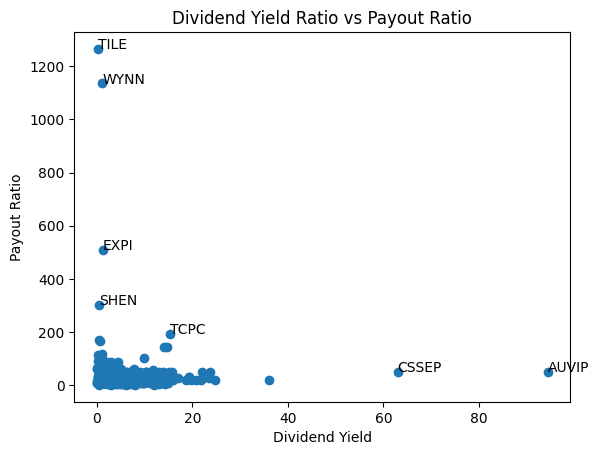

In [45]:
plt.scatter(nasdaq_dataset["DividendYield"], nasdaq_dataset["PayoutRatio"])
plt.title("Dividend Yield Ratio vs Payout Ratio")
plt.xlabel("Dividend Yield")
plt.ylabel("Payout Ratio")
[plt.text(row["DividendYield"], row["PayoutRatio"], row["Symbol"]) for k, row in nasdaq_dataset.iterrows() if 
    row["DividendYield"] > 60 or row["PayoutRatio"] > 180] #payout rate greater than 180% only for visibility
plt.show()

<p style="text-align: center;">
	<img src="data/AUVIP.png" alt="AUVIP" width="600"/>
</p>
<p style="text-align: center;"><strong>Figure 1: AUVIP stock price fluctuation from 2022 to 2023 (Google Finance, 2023)</strong></p>

<p style="text-align: center;">
	<img src="data/WYNN.png" alt="WYNN" width="600"/>
</p>
<p style="text-align: center;"><strong>Figure 2: WYNN income statement from 2023 (Nasdaq, 2023)</strong></p>


In [46]:
nasdaq_dataset[nasdaq_dataset["DividendYield"] > 60]

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
747,AUVIP,2.6250,94.43,49.752447,0.502476,6.0,0,1,0,0,0,0,0,0,0,0,0,0
1790,CSSEP,2.4372,62.98,49.752447,0.502476,12.0,0,1,0,0,0,0,0,0,0,0,0,0


In [47]:
nasdaq_dataset[nasdaq_dataset["PayoutRatio"] > 100].sort_values(by=['PayoutRatio'], ascending=False).head(3)

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
6407,TILE,0.04,0.32,1265.00,-11.6500,4.0,0,1,0,0,0,0,0,0,0,0,0,0
7011,WYNN,1.00,1.10,1135.50,-10.3550,3.0,0,1,0,0,0,0,0,0,0,0,0,0
2348,EXPI,0.20,1.31,507.67,-4.0767,4.0,0,0,0,0,1,0,0,0,0,0,0,0


<p style="text-align: justify;text-justify: inter-word;">Given the aforementioned considerations, we will implement a threshold filter to eliminate unappealing companies from the dataset. This filtration process will target stocks displaying a payout ratio exceeding 100% and a dividend yield surpassing 60%, thereby removing these stocks from further analysis.</p>

In [48]:
nasdaq_dataset = nasdaq_dataset[(nasdaq_dataset["PayoutRatio"] <= 100) & (nasdaq_dataset["DividendYield"] < 60)]
nasdaq_dataset

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
14,AAME,0.0200,1.00,15.460000,0.84540,1.0,0,0,0,0,1,0,0,0,0,0,0,0
17,AAON,0.3200,0.44,35.370000,0.64630,4.0,0,0,0,0,0,0,1,0,0,0,0,0
18,AAPL,0.9600,0.49,31.810000,0.68190,4.0,0,0,0,0,0,0,0,0,0,1,0,0
21,ABCB,0.6000,1.16,12.560000,0.87440,4.0,0,0,0,0,1,0,0,0,0,0,0,0
88,ACGLN,1.1375,5.70,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,ZEUS,0.5000,0.75,19.010000,0.80990,4.0,0,0,0,0,0,0,1,0,0,0,0,0
7136,ZION,1.6400,3.76,8.080000,0.91920,4.0,0,0,0,0,1,0,0,0,0,0,0,0
7137,ZIONL,2.4168,9.48,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0
7138,ZIONO,2.5053,9.79,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
#Getting the top 10 most attractive companies
most_attractive_stocks = nasdaq_dataset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)[0:10]
most_attractive_stocks

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
4736,OCCI,2.4000,35.98,18.302007,0.816980,5.0,0,0,0,0,1,0,0,0,0,0,0,0
1821,CUBA,0.6945,24.80,18.302007,0.816980,2.0,0,0,0,0,1,0,0,0,0,0,0,0
3244,IEP,4.0000,23.60,49.752447,0.502476,4.0,0,1,0,0,0,0,0,0,0,0,0,0
4216,MINDP,2.2500,23.56,27.281765,0.727182,1.0,0,0,0,0,0,0,1,0,0,0,0,0
5395,QRTEP,8.0000,21.94,49.752447,0.502476,4.0,0,1,0,0,0,0,0,0,0,0,0,0
2890,GREEL,2.1250,21.79,18.302007,0.816980,4.0,0,0,0,0,1,0,0,0,0,0,0,0
3224,ICMB,0.7200,20.81,18.302007,0.816980,4.0,0,0,0,0,1,0,0,0,0,0,0,0
4921,OXLC,0.9600,19.67,18.302007,0.816980,12.0,0,0,0,0,1,0,0,0,0,0,0,0
2385,FBIOP,2.3438,19.38,31.290625,0.687094,12.0,0,0,0,0,0,1,0,0,0,0,0,0
543,ARBKL,2.1872,19.36,30.765510,0.692345,4.0,0,0,0,0,0,0,0,0,0,1,0,0


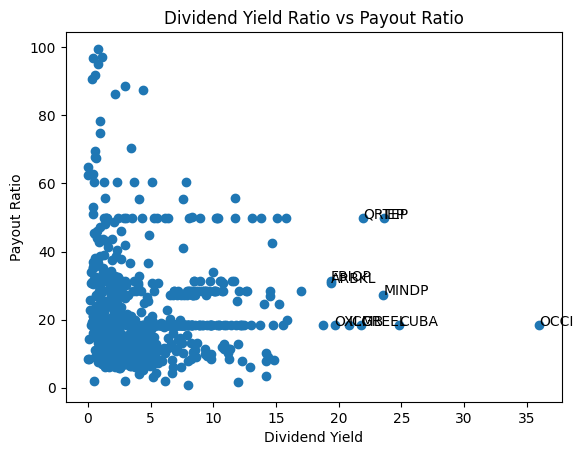

In [50]:
plt.scatter(nasdaq_dataset["DividendYield"], nasdaq_dataset["PayoutRatio"])
plt.title("Dividend Yield Ratio vs Payout Ratio")
plt.xlabel("Dividend Yield")
plt.ylabel("Payout Ratio")
[plt.text(row["DividendYield"], row["PayoutRatio"], row["Symbol"]) for k, row in nasdaq_dataset.iterrows() if k in most_attractive_stocks.index]
plt.show()

## Analysis Dividends per Sector

<p style="text-align: justify;text-justify: inter-word;">As per Fernando (2023), sector-wise dividend yields often exhibit distinct averages; for instance, technology stocks generally manifest lower average dividend yields compared to other sectors, while utilities tend to offer the highest average yields. However, our analysis for 2023 confirmed the trend of technology stocks featuring lower-than-average dividend yields. Surprisingly, in the context of the highest dividend yields for the year, the real estate sector emerged as the frontrunner, showcasing the highest yields. It's essential to bear in mind that varying time frames might yield different outcomes in this regard.</p>

In [51]:
nasdaq2023_dataset['Sector'].value_counts()

Sector
Finance                   388
Consumer Discretionary    120
Industrials                68
Technology                 59
Real Estate                46
Health Care                27
Energy                     25
Utilities                  19
Consumer Staples           16
Telecommunications         12
Basic Materials             4
Miscellaneous               2
Name: count, dtype: int64

In [52]:
def get_sector_metrics(field):
    sector_mappings = get_sector_mappings()
    for sector_name in sector_mappings:
        sector_id = sector_mappings[sector_name]
        subset = nasdaq_dataset[nasdaq_dataset['Sector_' + str(sector_id)] == 1]
        
        print(f'Average {field} to {sector_name}: {subset[field].mean():.3f}')
        print(f'Max {field} to {sector_name}: {subset[field].max():.3f}')
        print(f'Min {field} to {sector_name}:{subset[field].min():.3f}')
        print(f'Std of {field} to {sector_name}: {subset[field].std():.3f}')
        print('')

In [53]:
get_sector_metrics('AnnualDividendsPerShare')

Average AnnualDividendsPerShare to Basic Materials: 0.831
Max AnnualDividendsPerShare to Basic Materials: 1.781
Min AnnualDividendsPerShare to Basic Materials:0.044
Std of AnnualDividendsPerShare to Basic Materials: 0.804

Average AnnualDividendsPerShare to Consumer Discretionary: 1.302
Max AnnualDividendsPerShare to Consumer Discretionary: 8.000
Min AnnualDividendsPerShare to Consumer Discretionary:0.100
Std of AnnualDividendsPerShare to Consumer Discretionary: 1.267

Average AnnualDividendsPerShare to Consumer Staples: 1.447
Max AnnualDividendsPerShare to Consumer Staples: 3.600
Min AnnualDividendsPerShare to Consumer Staples:0.140
Std of AnnualDividendsPerShare to Consumer Staples: 1.025

Average AnnualDividendsPerShare to Energy: 1.797
Max AnnualDividendsPerShare to Energy: 13.480
Min AnnualDividendsPerShare to Energy:0.020
Std of AnnualDividendsPerShare to Energy: 2.758

Average AnnualDividendsPerShare to Finance: 1.212
Max AnnualDividendsPerShare to Finance: 7.600
Min AnnualDivid

In [54]:
get_sector_metrics('DividendYield')

Average DividendYield to Basic Materials: 3.413
Max DividendYield to Basic Materials: 7.360
Min DividendYield to Basic Materials:0.960
Std of DividendYield to Basic Materials: 2.782

Average DividendYield to Consumer Discretionary: 3.718
Max DividendYield to Consumer Discretionary: 23.600
Min DividendYield to Consumer Discretionary:0.370
Std of DividendYield to Consumer Discretionary: 4.054

Average DividendYield to Consumer Staples: 3.670
Max DividendYield to Consumer Staples: 15.870
Min DividendYield to Consumer Staples:0.220
Std of DividendYield to Consumer Staples: 3.809

Average DividendYield to Energy: 5.168
Max DividendYield to Energy: 14.220
Min DividendYield to Energy:0.650
Std of DividendYield to Energy: 3.882

Average DividendYield to Finance: 5.225
Max DividendYield to Finance: 35.980
Min DividendYield to Finance:0.070
Std of DividendYield to Finance: 3.891

Average DividendYield to Health Care: 5.263
Max DividendYield to Health Care: 19.380
Min DividendYield to Health Care

In [55]:
get_sector_metrics('PayoutRatio')

Average PayoutRatio to Basic Materials: 14.730
Max PayoutRatio to Basic Materials: 14.730
Min PayoutRatio to Basic Materials:14.730
Std of PayoutRatio to Basic Materials: 0.000

Average PayoutRatio to Consumer Discretionary: 28.216
Max PayoutRatio to Consumer Discretionary: 99.540
Min PayoutRatio to Consumer Discretionary:2.060
Std of PayoutRatio to Consumer Discretionary: 17.644

Average PayoutRatio to Consumer Staples: 19.907
Max PayoutRatio to Consumer Staples: 41.430
Min PayoutRatio to Consumer Staples:4.320
Std of PayoutRatio to Consumer Staples: 9.694

Average PayoutRatio to Energy: 13.215
Max PayoutRatio to Energy: 35.870
Min PayoutRatio to Energy:2.100
Std of PayoutRatio to Energy: 7.195

Average PayoutRatio to Finance: 14.965
Max PayoutRatio to Finance: 97.210
Min PayoutRatio to Finance:1.710
Std of PayoutRatio to Finance: 9.526

Average PayoutRatio to Health Care: 31.291
Max PayoutRatio to Health Care: 88.600
Min PayoutRatio to Health Care:7.050
Std of PayoutRatio to Health C

In [56]:
get_sector_metrics('RetentionRatio')

Average RetentionRatio to Basic Materials: 0.853
Max RetentionRatio to Basic Materials: 0.853
Min RetentionRatio to Basic Materials:0.853
Std of RetentionRatio to Basic Materials: 0.000

Average RetentionRatio to Consumer Discretionary: 0.718
Max RetentionRatio to Consumer Discretionary: 0.979
Min RetentionRatio to Consumer Discretionary:0.005
Std of RetentionRatio to Consumer Discretionary: 0.176

Average RetentionRatio to Consumer Staples: 0.801
Max RetentionRatio to Consumer Staples: 0.957
Min RetentionRatio to Consumer Staples:0.586
Std of RetentionRatio to Consumer Staples: 0.097

Average RetentionRatio to Energy: 0.868
Max RetentionRatio to Energy: 0.979
Min RetentionRatio to Energy:0.641
Std of RetentionRatio to Energy: 0.072

Average RetentionRatio to Finance: 0.850
Max RetentionRatio to Finance: 0.983
Min RetentionRatio to Finance:0.028
Std of RetentionRatio to Finance: 0.095

Average RetentionRatio to Health Care: 0.687
Max RetentionRatio to Health Care: 0.929
Min RetentionRa

In [57]:
get_sector_metrics('DividendCount')

Average DividendCount to Basic Materials: 4.000
Max DividendCount to Basic Materials: 4.000
Min DividendCount to Basic Materials:4.000
Std of DividendCount to Basic Materials: 0.000

Average DividendCount to Consumer Discretionary: 3.956
Max DividendCount to Consumer Discretionary: 12.000
Min DividendCount to Consumer Discretionary:1.000
Std of DividendCount to Consumer Discretionary: 1.265

Average DividendCount to Consumer Staples: 3.500
Max DividendCount to Consumer Staples: 4.000
Min DividendCount to Consumer Staples:1.000
Std of DividendCount to Consumer Staples: 0.966

Average DividendCount to Energy: 3.840
Max DividendCount to Energy: 4.000
Min DividendCount to Energy:2.000
Std of DividendCount to Energy: 0.554

Average DividendCount to Finance: 4.346
Max DividendCount to Finance: 17.000
Min DividendCount to Finance:1.000
Std of DividendCount to Finance: 1.964

Average DividendCount to Health Care: 4.037
Max DividendCount to Health Care: 12.000
Min DividendCount to Health Care:1

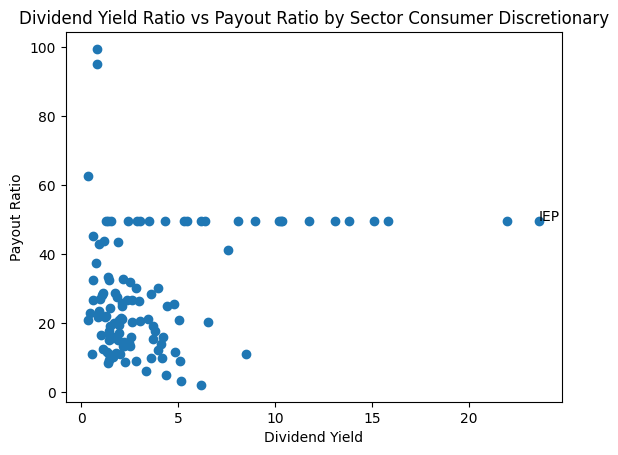

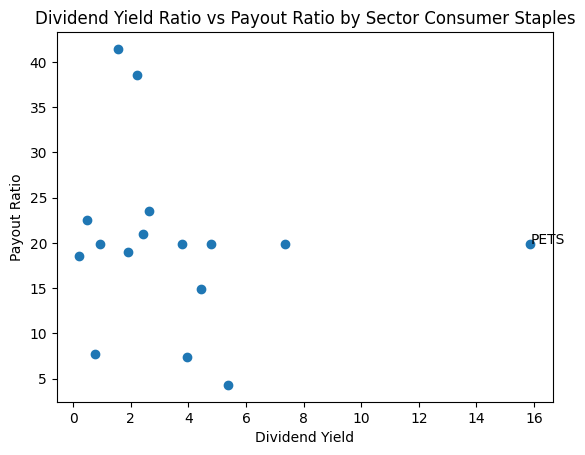

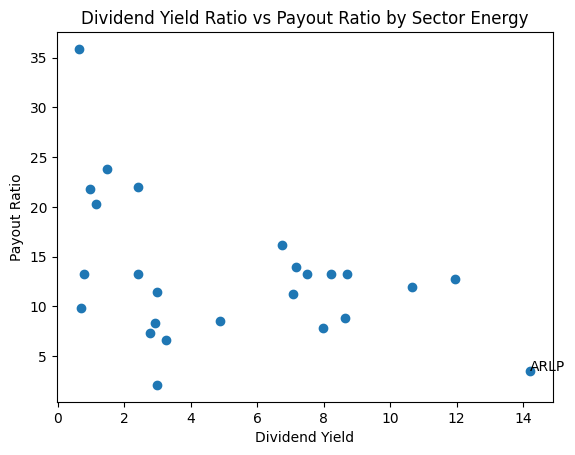

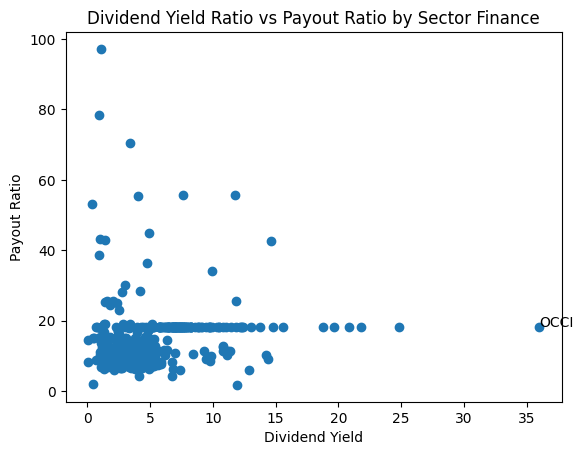

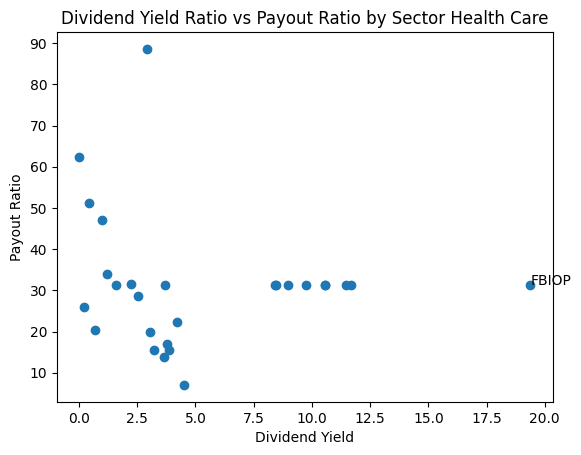

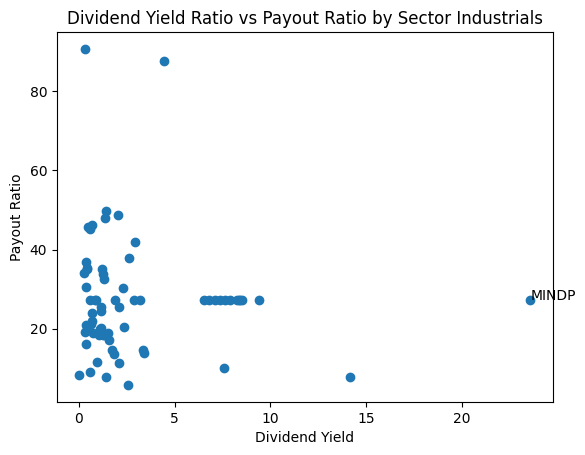

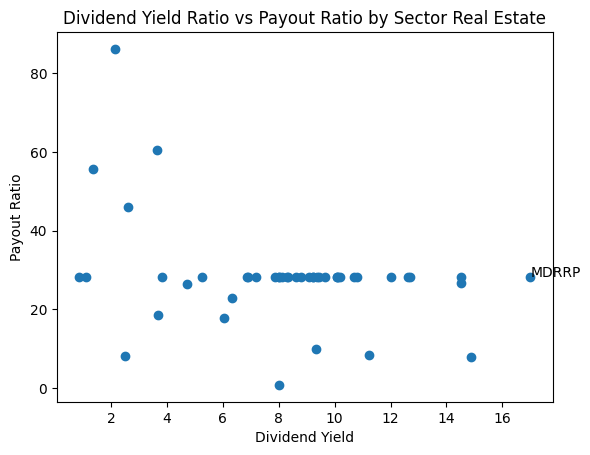

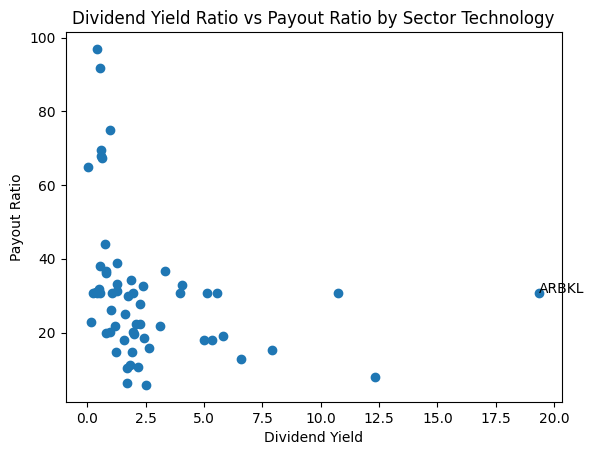

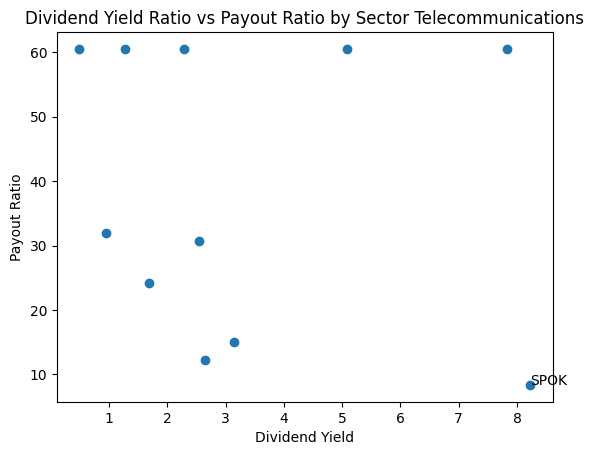

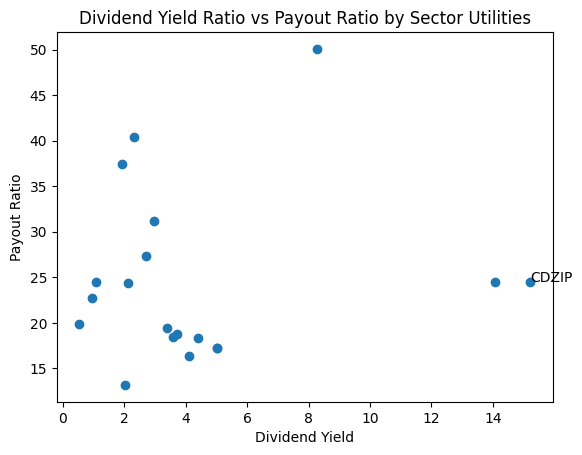

In [58]:
most_attractive_per_sector = pd.DataFrame()

sector_mappings = get_sector_mappings()

for sector_name in sector_mappings:
    sector_id = sector_mappings[sector_name]
    subset = nasdaq_dataset[nasdaq_dataset['Sector_' + str(sector_id)] == 1]
    
    if len(subset) < 10:
        continue

    most_attractive_stocks = subset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)[0:1]
    most_attractive_per_sector = pd.concat([most_attractive_per_sector, most_attractive_stocks], ignore_index=True)

    plt.scatter(subset["DividendYield"], subset["PayoutRatio"])
    plt.title(f"Dividend Yield Ratio vs Payout Ratio by Sector {sector_name}")
    plt.xlabel("Dividend Yield")
    plt.ylabel("Payout Ratio")
    [plt.text(row["DividendYield"], row["PayoutRatio"], row["Symbol"]) for k, row in nasdaq_dataset.iterrows() if k in most_attractive_stocks.index]
    plt.show()

In [59]:
most_attractive_per_sector.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
3,OCCI,2.4000,35.98,18.302007,0.816980,5.0,0,0,0,0,1,0,0,0,0,0,0,0
0,IEP,4.0000,23.60,49.752447,0.502476,4.0,0,1,0,0,0,0,0,0,0,0,0,0
5,MINDP,2.2500,23.56,27.281765,0.727182,1.0,0,0,0,0,0,0,1,0,0,0,0,0
4,FBIOP,2.3438,19.38,31.290625,0.687094,12.0,0,0,0,0,0,1,0,0,0,0,0,0
7,ARBKL,2.1872,19.36,30.765510,0.692345,4.0,0,0,0,0,0,0,0,0,0,1,0,0
6,MDRRP,4.0000,17.00,28.302143,0.716979,3.0,0,0,0,0,0,0,0,0,1,0,0,0
1,PETS,1.2000,15.87,19.907273,0.800927,3.0,0,0,1,0,0,0,0,0,0,0,0,0
9,CDZIP,2.2000,15.22,24.525000,0.754750,4.0,0,0,0,0,0,0,0,0,0,0,0,1
2,ARLP,2.8000,14.22,3.540000,0.964600,4.0,0,0,0,1,0,0,0,0,0,0,0,0
8,SPOK,1.2500,8.23,8.370000,0.916300,4.0,0,0,0,0,0,0,0,0,0,0,1,0


# Conclusion

<p style="text-align: justify;text-justify: inter-word;">Throughout this coursework, we have introduced an analytical framework designed to evaluate the appeal of stocks that offered dividends over a specified period. Our evaluation focused on companies listed on NASDAQ that distributed dividends in 2023. This analytical approach revolves around two key dividend indices: the dividend yield and the payout ratio. For sustainable dividend payouts in subsequent periods, it's crucial for the payout ratio to be below 100%. Regarding the dividend yield ratio, companies exhibiting values between 30% to 50% are often perceived as attractive. Notably, dividend yields surpassing 60% tend to correlate with significant stock price declines, while lower values indicate companies that might lack attractiveness in the upcoming period. This framework serves as a guide to discerning the attractiveness and potential sustainability of dividend-paying stocks.</p>

<p style="text-align: justify;text-justify: inter-word;">Employing the proposed framework, we were able to affirm the following companies are the most attractive companies from the NASDAQ index in 2023: OCCI, CUBA, IEP, MINDP, QRTEP, GREEL, ICMB, OXLC, FBIOP, and ARBKL. Upon evaluating all NASDAQ index companies, the dividend yield exhibited a standard deviation of 4.069, whereas the payout ratio displayed a standard deviation of 14.823.</p>

<p style="text-align: justify;text-justify: inter-word;">In an attempt to minimize the standard deviation values associated with the dividend yield and the payout ratio, we applied our devised framework to pinpoint the most attractive stock within each sector. Sectors with lower standard deviations for the dividend yield included Miscellaneous (0.573), Telecommunications (2.65), and Basic Materials (2.782). Conversely, sectors exhibiting higher standard deviations concerning the dividend yield encompassed Health Care (4.713), Consumer Discretionary (4.054), and Utilities (4.032). As for the payout ratio, sectors displaying smaller standard deviations comprised Miscellaneous (4.052), Energy (7.195), and Utilities (9.379). In contrast, sectors presenting higher standard deviations concerning the payout ratio were Telecommunications (22.103), Technology (19.384), and Consumer Discretionary (4.054).</p>

- Finance: OCCI
- Consumer Discretionary: IEP
- Industrials: MINDP
- Health Care: FBIOP
- Technology: ARBKL
- Real Estate: MDRRP
- Consumer Staples: PETS
- Utilities: CDZIP
- Energy: ARLP
- Telecommunications: SPOK

<p style="text-align: justify;text-justify: inter-word;">In conclusion, the target of this coursework was to present a framework to assess the attractiveness of stocks and present the companies that overperformed considering the evaluated metrics. As an extension work,  it's possible to apply different stock exchanges such as SP500, IBOVESPA, and FTSE and see how stocks of the same sector perform in different exchanges. The data used in this article is public and is not intended to harm or benefit any mentioned company.</p>

# References

- Amos, D. (2023) A practical introduction to web scraping in Python, Real Python. Available at: https://realpython.com/python-web-scraping-practical-introduction/ (Accessed: 02 January 2024).
- Brownlee, J. (2019) How to one hot encode sequence data in python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/ (Accessed: 03 January 2024).
- Fernando, J. (2023) Dividend yield: Meaning, formula, example, and pros and cons, Investopedia. Reviewed by M. Boyle. Available at: https://www.investopedia.com/terms/d/dividendyield.asp (Accessed: 18 December 2023).
- Gunnars, K. (2023) What is a dividend? definition and details, Stock Analysis. Edited by A. Wood. Available at: https://stockanalysis.com/term/dividend/ (Accessed: 25 December 2023).
- The investopedia team. (2023) How to calculate the dividend payout ratio from an income statement, Investopedia. Reviewed by C. Rhinehart. Available at: https://www.investopedia.com/ask/answers/012015/how-do-i-calculate-dividend-payout-ratio-income-statement.asp (Accessed: 25 December 2023).
- Rinehart, C. et al. (2022) Equity Income Investing: Beyond Dividend Yield. rep. Johnson Asset Management. Available at: https://www.sec.gov/Archives/edgar/data/892657/000110465922112395/tm2229178-1_497ad.pdf (Accessed: 25 December 2023).
- Nasdaq. (2023) WYNN Financials: Annual Income Statement. Available at: https://www.nasdaq.com/market-activity/stocks/wynn/financials (Accessed: 25 December 2023).
- Google Finance. (2023) Applied UV Inc Preferred Shares Series A. Available at: https://www.google.com/finance/quote/AUVIP:NASDAQ?hl=en&window=5Y (Accessed: 25 December 2023).
